In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [15]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [16]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [17]:
# TO DO:
# 1 -> En función de la región, analizar como cada construcción está destruida.
# 1 -> Region que más sufrió.
# 1 -> Daño en función de las superestructuras.
# 1 -> Analizar como varía el nivel de destrucción en función de la posición.
# 1 -> Analizar como varía el nivel de destrucción en función del material.
# 3 -> Ver como el área, altura de la estructura afecta a su nivel destrucción
#    (gráficos continuos).
# 3 -> Analizar la relacion entre altura por piso (height_percentage/floors) y nivel de destruccion.
# 1 -> Ver cuantas veces, en función del uso secundario de una estructura,
#    se contabiliza para cada tipo de daño.
# 2 -> Ver que tipo de estructura tuvo la peor destrucción (definición variable, 
#    puede pensarse como los que recibieron mayor cantidad de terremotos, etc)
# 1 -> Analizar daño en función de la cantidad de pisos de la estructura.
# 1 -> Analizar cantidad de familias afectadas segun el nivel de destruccion.

In [18]:
# Primero observamos que los tipos de las columnas corresponden a lo que deberían ser.
values.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [19]:
ages = values.loc[:, ["building_id", "age"]]
ages_damage = ages.merge(labels, left_on = "building_id", right_on = "building_id")
ages_damage = ages_damage.loc[:, ["age", "damage_grade"]]
ages_damage

,age,damage_grade
0,30,3
1,10,2
2,10,3
3,10,2
4,30,3
...,...,...
260596,55,2
260597,0,3
260598,55,3
260599,10,2


<AxesSubplot:title={'center':'Relacion entre la longevidad de la estructura y el nivel de destruccion.'}, xlabel='Edad de la construccion', ylabel='Promedio de nivel de destruccion'>

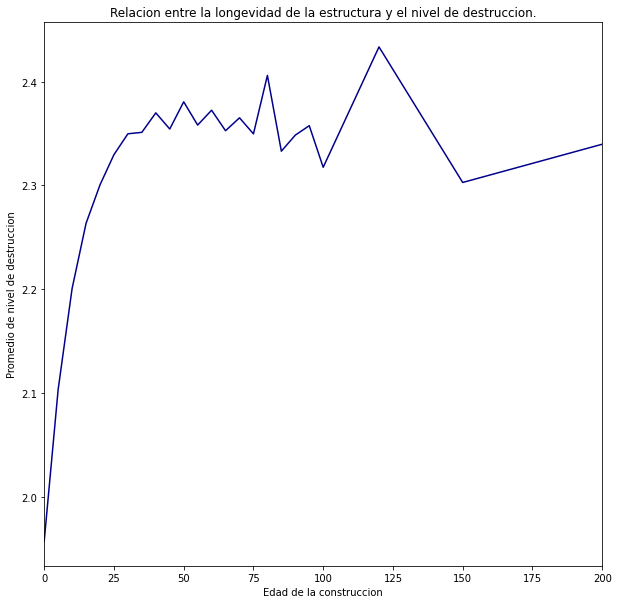

In [35]:
ages_damage['avg_damage_grade_for_age'] = ages_damage.groupby('age')['damage_grade'].transform('mean')
ages_damage['more_than_100_buildings'] = ages_damage.groupby('age')['damage_grade'].transform('count') > 100
ages_damage = ages_damage[ages_damage["more_than_100_buildings"]]
avg_dmg_per_age = ages_damage.loc[:, ["age", "avg_damage_grade_for_age"]].groupby('age').agg({"avg_damage_grade_for_age": "max"})
avg_dmg_per_age["avg_damage_grade_for_age"].plot(figsize = (10,10),\
                                                title = "Relacion entre la longevidad de la estructura y el nivel de destruccion.",\
                                                xlim = (0, 200),\
                                                color = "darkblue",\
                                                xlabel = "Edad de la construccion",\
                                                ylabel = "Promedio de nivel de destruccion")